In [1]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd
import librosa
import librosa.display

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer

/content/drive/MyDrive/Colab Notebooks/졸업작품/EnglishSpeechAccentAnalyzer


In [ ]:
#load the data 
df = pd.read_csv("speakers.csv", header=0)

# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

(2172, 10) is the shape of the dataset
------------------------
    age  age_onset                       birthplace filename native_language  \
0  25.0       13.0  kabul, zoroastrian, afghanistan    dari1            dari   
1  55.0       12.0               kabul, afghanistan    dari2            dari   
2  20.0       12.0               kabul, afghanistan    dari3            dari   
3  59.0       13.0               kabul, afghanistan    dari4            dari   
4  56.0       32.0               kabul, afghanistan    dari5            dari   

      sex  speakerid      country  file_missing? continent  
0  female         56  afghanistan          False      asia  
1    male        642  afghanistan          False      asia  
2    male        968  afghanistan          False      asia  
3    male       1754  afghanistan          False      asia  
4  female       1868  afghanistan          False      asia  


In [ ]:
print(df.columns)

Index(['age', 'age_onset', 'birthplace', 'filename', 'native_language', 'sex',
       'speakerid', 'country', 'file_missing?', 'continent'],
      dtype='object')


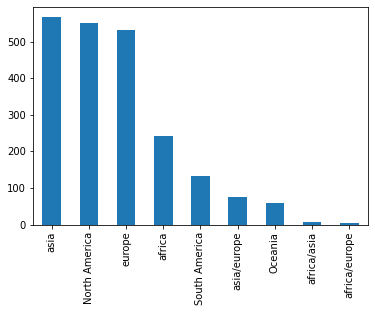

In [ ]:
df['continent'].value_counts().plot(kind='bar')

# Librosa

Librosa 라이브러리는 음성 데이터를 다루는 대표적인 라이브러리

간단하게 wav 파일을 불러와서 파형을 직접 가공할 수도 있고, FFT나 MFCC 등 다양한 형태로 변환하는 기능들도 제공

영국 여성

In [ ]:
fname1 = '../archive/recordings/recordings/' + 'english11.mp3'
ipd.Audio(fname1)

미국 여성

In [ ]:
fname2 = '../archive/recordings/recordings/' + 'english285.mp3'
ipd.Audio(fname2)

베트남 여성

In [ ]:
fname3 = '../archive/recordings/recordings/' + 'vietnamese10.mp3'
ipd.Audio(fname3)

In [ ]:
import librosa
import librosa.display

import IPython.display as ipd
import matplotlib.pyplot as plt

In [ ]:
ipd.Audio(fname1)

**waveform**

y, sr = librosa.load(audio_path, sr=16000)
- y: 파형의 amplitude(진폭) 값. 1차원 numpy float array. 소리가 떨리는 세기(진폭)를 시간 순서대로 나열한 것
- sr: sampling rate(초당 샘플 갯수). default 값은 22050Hz. 단위 1초당 Hz

In [ ]:
y, sr = librosa.load(fname1)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[ 0.00353217  0.00519242  0.0048619  ... -0.00131373 -0.0012896
  0.        ]
461222
Sampling rate(Hz):22050
Audio length(seconds): 20.92


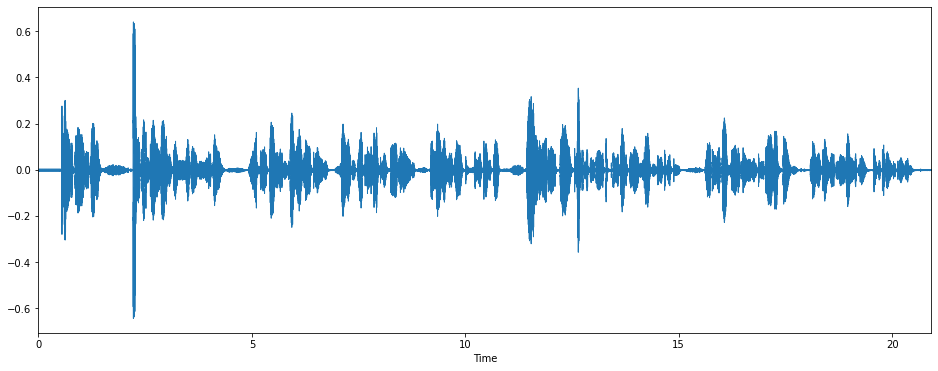

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

In [ ]:
y, sr = librosa.load(fname2)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[-0.00648529 -0.00984094 -0.00836335 ...  0.01153128  0.01419185
  0.        ]
475680
Sampling rate(Hz):22050
Audio length(seconds): 21.57


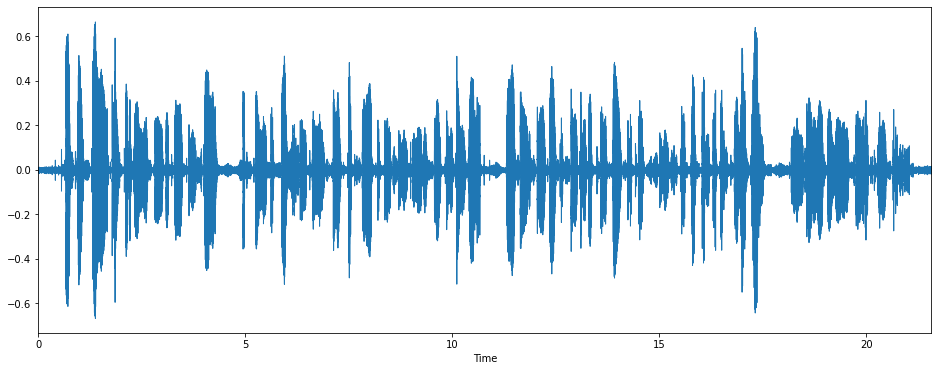

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

In [ ]:
y, sr = librosa.load(fname3)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [ ]:
print(y)
print(len(y))
print('Sampling rate(Hz):%d' %sr)
print('Audio length(seconds): %.2f'%(len(y)/sr))

[-0.00020476 -0.00125973 -0.00095896 ... -0.00436103 -0.0023478
 -0.0021992 ]
1040636
Sampling rate(Hz):22050
Audio length(seconds): 47.19


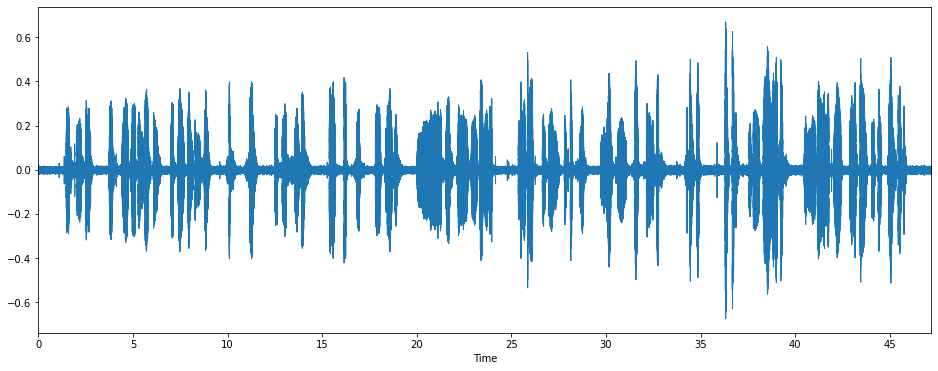

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.waveplot(y=y, sr=sr)
plt.show()

**Fourier Transform(푸리에 변환)**

시간 영역 데이터를 주파수 영역으로 변경
: time(시간) domain -> frequency(진동수) domain 변경 시 얻는 정보가 많아져 분석 용이
- y : 주파수(로그 스케일)
- color : 데시벨(진폭)

In [ ]:
#n_fft: window size
#이때, 음성의 길이를 얼마만큼으로 자를 것인가?를 window라고 부른다

D = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))

(1025, 2033)


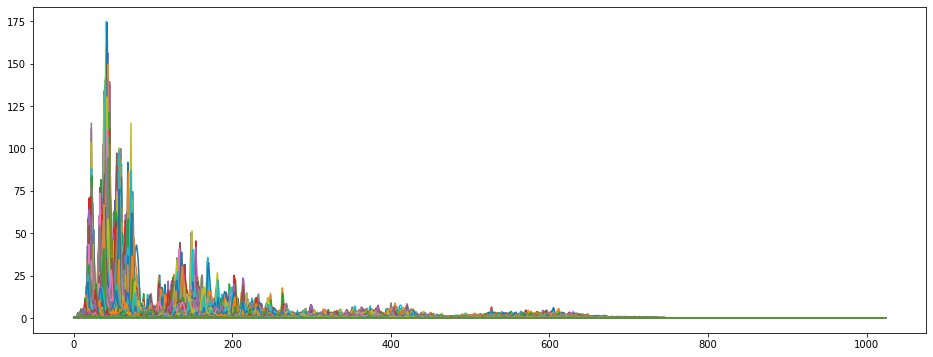

In [ ]:
print(D.shape)

plt.figure(figsize=(16,6))
plt.plot(D)
plt.show()

**chroma_stft**

In [ ]:
chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=10000)

print(chromagram)

[[0.796584   0.7911676  0.14131421 0.14919494 0.3801174  0.29937014
  0.05049123 0.9362791  0.01418291 0.531086   0.4808896  0.36307898
  1.         0.06908188 0.02169847 0.4225554  0.3949889  0.2879981
  0.65652764 0.10514455 0.3042883  0.05278113 1.         0.8271442
  0.26257592 0.61026883 0.22147112 0.13908891 0.67076117 0.24867214
  0.42657438 0.18589477 0.8805024  0.2947989  0.3781177  0.22082126
  0.1268625  0.1355179  0.9966385  1.         0.05653849 0.04065307
  0.54222023 0.6611982  1.         1.         0.9561952 ]
 [0.8669587  0.8657698  0.41987222 0.81431645 0.30389974 0.09415422
  0.32984826 0.14504853 0.07181143 0.36089778 0.34668308 0.7673829
  0.4724384  0.49607968 0.11299109 0.48539895 0.06267735 0.441564
  0.85664845 0.9445046  0.15290008 0.17387737 0.3764499  0.45316768
  0.37714994 0.94166714 0.21758798 0.6424925  0.9213965  0.28554764
  1.         0.38368666 0.9427418  0.35774368 0.20480163 0.33071917
  0.02265985 0.86186534 1.         0.93299794 0.29337406 0.0550

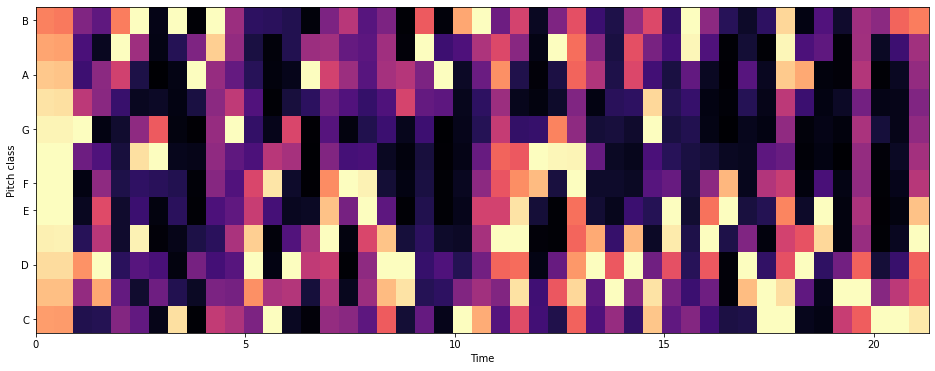

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=10000)
plt.show()

In [ ]:
chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=4096)

print(chromagram)

[[0.82150704 0.4664565  0.73370796 ... 0.88053584 0.7620424  0.71287584]
 [0.34410128 0.69992536 0.6393932  ... 1.         0.6522792  0.61965203]
 [0.22087109 0.94745547 0.6791059  ... 0.77510107 0.6780188  0.5991049 ]
 ...
 [0.36711743 0.86241055 0.7662466  ... 0.57233125 0.8270838  0.8006792 ]
 [0.38012594 1.         0.8870349  ... 0.9207467  0.8414739  1.        ]
 [1.         0.9495077  1.         ... 0.9120609  1.         0.9158611 ]]


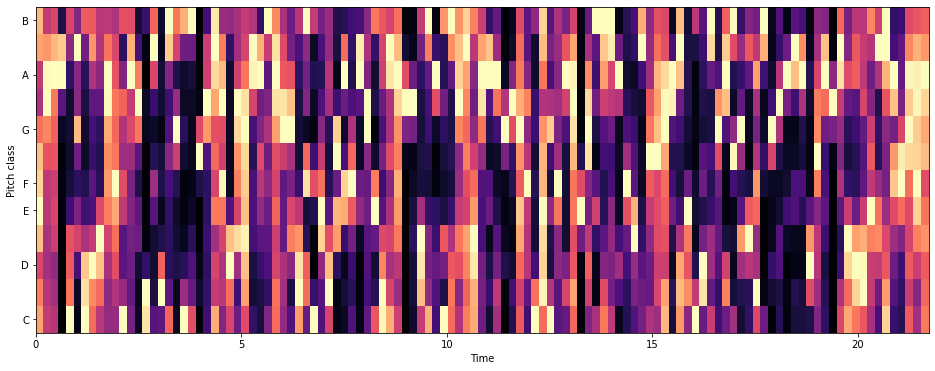

In [ ]:
plt.figure(figsize=(16,6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=4096)
plt.show()

**spectral centroid**

소리를 주파수로 표현했을 때, 주파수의 가중평균을 계산하여 소리의 "무게중심"이 어딘지를 알려주는 지표

In [ ]:
import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

In [ ]:
spectral_centroids=librosa.feature.spectral_centroid(y, sr=sr)[0]

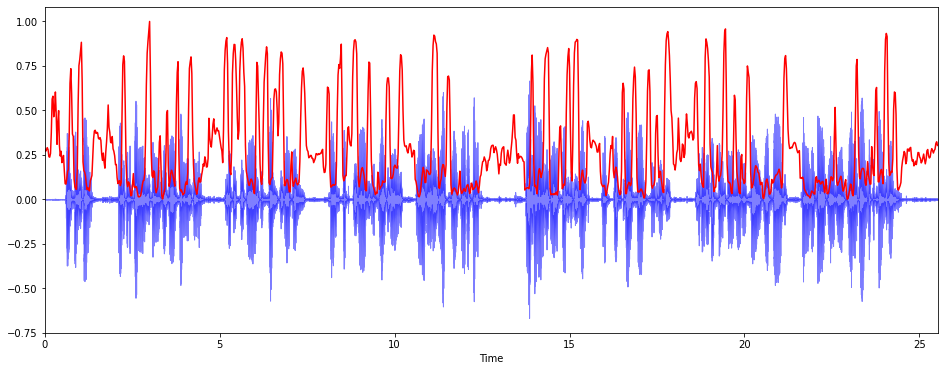

In [ ]:
#Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

**Spectral Rolloff**

신호 모양을 측정한다
총 스펙트럴 에너지 중 낮은 주파수(85% 이하)에 얼마나 많이 집중되어 있는가

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=sr)[0]

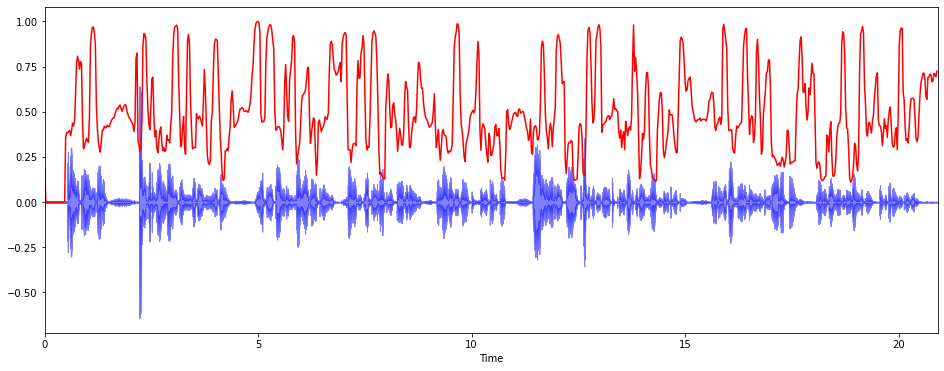

In [ ]:
#Computing the time variable for visualization
frames = range(len(spectral_rolloff))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

In [ ]:
spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=sr)[0]

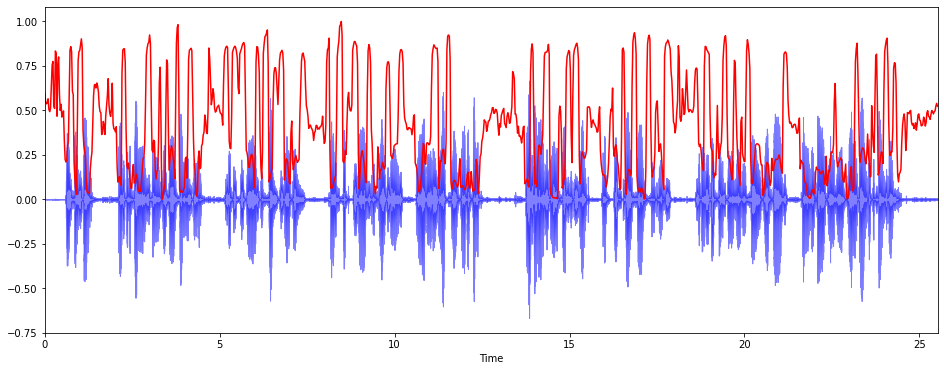

In [ ]:
#Computing the time variable for visualization
frames = range(len(spectral_rolloff))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

import sklearn
def normalize(x, axis=0):
  return sklearn.preprocessing.minmax_scale(x, axis=axis)    #sk.minmax_scale() : 최대 최소를 0 ~ 1 로 맞춰준다.

plt.figure(figsize=(16,6))
librosa.display.waveplot(y, sr=sr, alpha=0.5, color='b')
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

In [ ]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)
print(spectral_bandwidth.mean())

1934.5422340489704


**Mel-Frequency Cepstral Coefficients(MFCCs)**

특징들의 작은 집합(약 10-20)으로 스펙트럴 포곡선의 전체적인 모양을 축약하여 보여줌

In [ ]:
mfccs=librosa.feature.mfcc(y, sr=sr)

mean: 0.53
var: 0.03


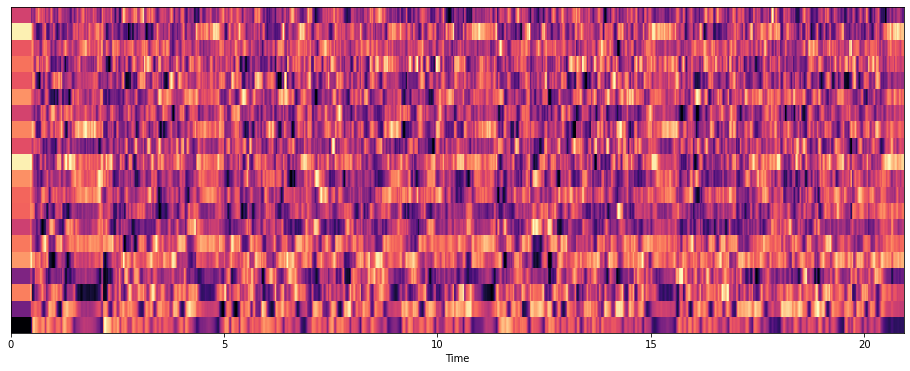

In [ ]:
mfccs = normalize(mfccs,axis=1)

print('mean: %.2f' % mfccs.mean())
print('var: %.2f' % mfccs.var())

plt.figure(figsize=(16,6))
librosa.display.specshow(mfccs,sr=sr, x_axis='time')
plt.show()

**zero_crossing_rate**

In [ ]:
zero_crossing=librosa.zero_crossings(y, pad=True)

In [ ]:
print(sum(zero_crossing))

67750


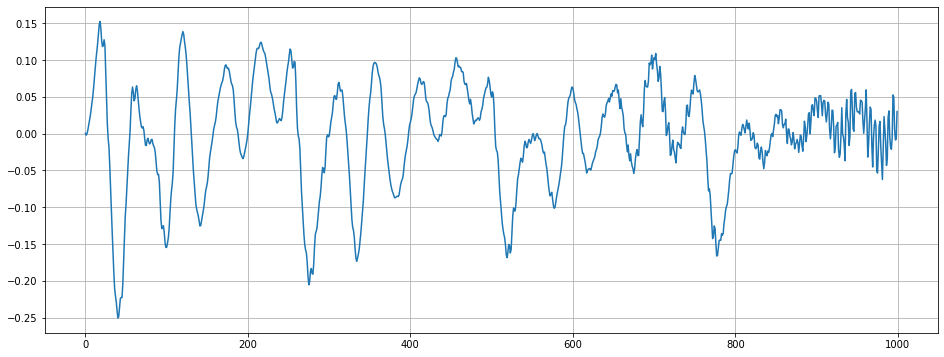

In [ ]:
n0 = 20000
n1 = 21000

plt.figure(figsize=(16,6))
plt.plot(y[n0:n1])
plt.grid()
plt.show()

In [ ]:
zero_crossing_rate=librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)

In [ ]:
zero_crossing_rate

array([[0.02001953, 0.03857422, 0.05224609, ..., 0.11230469, 0.09863281,
        0.08349609]])

**harmonic**

In [ ]:
harmonic = librosa.effects.harmonic(y)

# 분류 알고리즘

In [ ]:
df.insert(10, "chroma_stft_mean", "")

In [ ]:
df.insert(11, "chroma_stft_var", "")
df.insert(12, "spectral_centroid_mean", "")
df.insert(13, "spectral_centroid_var", "")
df.insert(14, "spectral_bandwidth_mean", "")
df.insert(15, "spectral_bandwidth_var", "")
df.insert(16, "rolloff_mean", "")
df.insert(17, "rolloff_var", "")
df.insert(18, "zero_crossing_rate_mean", "")
df.insert(19, "zero_crossing_rate_var", "")
df.insert(20, "harmony_mean", "")
df.insert(21, "harmony_var","")
df.insert(22, "tempo", "")

In [ ]:
df.insert(23, "mfcc1_mean", "")
df.insert(24, "mfcc1_var", "")
df.insert(25, "mfcc2_mean", "")
df.insert(26, "mfcc2_var", "")
df.insert(27, "mfcc3_mean", "")
df.insert(28, "mfcc3_var", "")
df.insert(29, "mfcc4_mean", "")
df.insert(30, "mfcc4_var", "")
df.insert(31, "mfcc5_mean", "")
df.insert(32, "mfcc5_var", "")
df.insert(33, "mfcc6_mean", "")
df.insert(34, "mfcc6_var", "")
df.insert(35, "mfcc7_mean", "")
df.insert(36, "mfcc7_var", "")
df.insert(37, "mfcc8_mean", "")
df.insert(38, "mfcc8_var", "")
df.insert(39, "mfcc9_mean", "")
df.insert(40, "mfcc9_var", "")
df.insert(41, "mfcc10_mean", "")
df.insert(42, "mfcc10_var", "")
df.insert(43, "mfcc11_mean", "")
df.insert(44, "mfcc11_var", "")

In [ ]:
df.insert(45, "mfcc12_mean", "")
df.insert(46, "mfcc12_var", "")
df.insert(47, "mfcc13_mean", "")
df.insert(48, "mfcc13_var", "")
df.insert(49, "mfcc14_mean", "")
df.insert(50, "mfcc14_var", "")
df.insert(51, "mfcc15_mean", "")
df.insert(52, "mfcc15_var", "")
df.insert(53, "mfcc16_mean", "")
df.insert(54, "mfcc16_var", "")
df.insert(55, "mfcc17_mean", "")
df.insert(56, "mfcc17_var", "")
df.insert(57, "mfcc18_mean", "")
df.insert(58, "mfcc18_var", "")
df.insert(59, "mfcc19_mean", "")
df.insert(60, "mfcc19_var", "")
df.insert(61, "mfcc20_mean", "")
df.insert(62, "mfcc20_var", "")

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
count=1
for idx, row in df.iterrows():
  if count<1480:
    count+=1
    continue
  fname='../archive/recordings/recordings/'+ row['filename'] +'.mp3'
  y, sr = librosa.load(fname)
  print(idx)
  print(fname)

  #chroma_stft
  chromagram=librosa.feature.chroma_stft(y, sr=sr, hop_length=512)
  df['chroma_stft_mean'][idx] = chromagram.mean()
  df['chroma_stft_var'][idx] = chromagram.var()

  #spectral_centroid
  spectral_centroids=librosa.feature.spectral_centroid(y, sr=sr)
  df['spectral_centroid_mean'][idx]=spectral_centroids.mean()
  df['spectral_centroid_var'][idx]=spectral_centroids.var()

  #spectral_bandwidth
  spectral_bandwidth = librosa.feature.spectral_bandwidth(y, sr=sr)
  df['spectral_bandwidth_mean'][idx]=spectral_bandwidth.mean()
  df['spectral_bandwidth_var'][idx]=spectral_bandwidth.var()

  #rolloff
  spectral_rolloff=librosa.feature.spectral_rolloff(y, sr=sr)
  df['rolloff_mean'][idx]=spectral_rolloff.mean()
  df['rolloff_var'][idx]=spectral_rolloff.var()

  #zero_crossing_rate
  zero_crossing_rate=librosa.feature.zero_crossing_rate(y, frame_length=2048, hop_length=512, center=True)
  df['zero_crossing_rate_mean'][idx]=zero_crossing_rate.mean()
  df['zero_crossing_rate_var'][idx]=zero_crossing_rate.var()

  #harmony
  harmonic = librosa.effects.harmonic(y)
  df['harmony_mean'][idx]=harmonic.mean()
  df['harmony_var'][idx]=harmonic.var()

  #tempo
  tempo = librosa.beat.tempo(y, sr=sr)
  df['tempo'][idx]=tempo

  #mfcc
  mfccs=librosa.feature.mfcc(y, sr=sr)
  for i in range(1, 21):
    mean_name = 'mfcc'+str(i)+'_mean'
    mean_var = 'mfcc'+str(i)+'_var'
    df[mean_name][idx] = mfccs[i-1].mean()
    df[mean_var][idx] = mfccs[i-1].var()
  
  df.to_csv('../speakers_0916.csv', sep=',')
  

1504
../archive/recordings/recordings/bari2.mp3
1505
../archive/recordings/recordings/dinka1.mp3
1506
../archive/recordings/recordings/nuer1.mp3
1507
../archive/recordings/recordings/shilluk1.mp3
1508
../archive/recordings/recordings/swedish1.mp3
1509
../archive/recordings/recordings/swedish10.mp3
1510
../archive/recordings/recordings/swedish12.mp3
1511
../archive/recordings/recordings/swedish13.mp3
1512
../archive/recordings/recordings/swedish14.mp3
1513
../archive/recordings/recordings/swedish15.mp3
1514
../archive/recordings/recordings/swedish16.mp3
1515
../archive/recordings/recordings/swedish17.mp3
1516
../archive/recordings/recordings/swedish18.mp3
1517
../archive/recordings/recordings/swedish2.mp3
1518
../archive/recordings/recordings/swedish20.mp3
1519
../archive/recordings/recordings/swedish3.mp3
1520
../archive/recordings/recordings/swedish4.mp3
1521
../archive/recordings/recordings/swedish5.mp3
1522
../archive/recordings/recordings/swedish6.mp3
1523
../archive/recordings/rec

In [ ]:
df = pd.read_csv("../EnglishSpeechAccentAnalyzer/speakers_all.csv", header=0, dtype={'birthplace':str})

In [ ]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
age               0
age_onset         0
birthplace        0
               ... 
mfcc18_var      663
mfcc19_mean     663
mfcc19_var      663
mfcc20_mean     663
mfcc20_var      663
Length: 65, dtype: int64

In [ ]:
A = df[df['file_missing?']==True].index

In [ ]:
df.drop(A, axis='index', inplace=True)

In [ ]:
B= df[df['country'].isna()].index

In [ ]:
df.drop(B, axis='index', inplace=True)

In [ ]:
C=df[df['filename']=='nicaragua'].index
df.drop(C, axis='index', inplace=True)

In [ ]:
label_index=dict()
index_label=dict()

for i, x in enumerate(data.country.unique()):
  label_index[x]=i
  index_label[i]=x

print(label_index)

{'afghanistan': 0, 'albania': 1, 'algeria': 2, 'andorra': 3, 'angola': 4, 'antigua and barbuda': 5, 'argentina': 6, 'armenia': 7, 'australia': 8, 'austria': 9, 'azerbaijan': 10, 'bahrain': 11, 'bangladesh': 12, 'barbados': 13, 'belarus': 14, 'belgium': 15, 'belize': 16, 'benin': 17, 'bolivia': 18, 'bosnia': 19, 'bosnia and herzegovina': 20, 'botswana': 21, 'brazil': 22, 'bulgaria': 23, 'burkina faso': 24, 'burundi': 25, 'cambodia': 26, 'cameroon': 27, 'canada': 28, 'chad': 29, 'chile': 30, 'china': 31, 'colombia': 32, 'costa rica': 33, 'croatia': 34, 'cuba': 35, 'curacao': 36, 'cyprus': 37, 'czech republic': 38, 'democratic republic of congo': 39, 'denmark': 40, 'dominican republic': 41, 'ecuador': 42, 'egypt': 43, 'el salvador': 44, 'equatorial guinea': 45, 'eritrea': 46, 'estonia': 47, 'ethiopia': 48, 'faroe islands': 49, 'federated states of micronesia': 50, 'fiji': 51, 'finland': 52, 'france': 53, 'gabon': 54, 'germany': 55, 'ghana': 56, 'greece': 57, 'guatemala': 58, 'guinea': 59,

In [ ]:
data.country = [label_index[l] for l in data.country]

In [ ]:
label_index=dict()
index_label=dict()

for i, x in enumerate(data.native_language.unique()):
  label_index[x]=i
  index_label[i]=x

print(label_index)

{'dari': 0, 'farsi': 1, 'pashto': 2, 'uzbek': 3, 'albanian': 4, 'greek': 5, 'arabic': 6, 'french': 7, 'kabyle': 8, 'kikongo': 9, 'portuguese': 10, 'english': 11, 'spanish': 12, 'armenian': 13, 'khmer': 14, 'german': 15, 'yiddish': 16, 'azerbaijani': 17, 'bengali': 18, 'chittagonian': 19, 'sylheti': 20, 'belarusan': 21, 'russian': 22, 'dutch': 23, 'vlaams': 24, 'garifuna': 25, 'yoruba': 26, 'quechua': 27, 'serbian': 28, 'bosnian': 29, 'croatian': 30, 'kalanga': 31, 'tswana': 32, 'bulgarian': 33, 'mongolian': 34, 'moore': 35, 'rundi': 36, 'bafang': 37, 'bamun': 38, 'ngemba': 39, 'finnish': 40, 'sarua': 41, 'catalan': 42, 'bai': 43, 'cantonese': 44, 'gan': 45, 'mandarin': 46, 'naxi': 47, 'taishan': 48, 'teochew': 49, 'uyghur': 50, 'wu': 51, 'xiang': 52, 'papiamentu': 53, 'czech': 54, 'kiswahili': 55, 'lingala': 56, 'danish': 57, 'fang': 58, 'tigrigna': 59, 'estonian': 60, 'amharic': 61, 'gedeo': 62, 'hadiyya': 63, 'kambaata': 64, 'oromo': 65, 'faroese': 66, 'lamotrekese': 67, 'mortlockese

In [ ]:
data.native_language=[label_index[l] for l in data.native_language]

In [ ]:
D = data[data['sex']=='famale'].index

In [ ]:
data.drop(D, axis='index', inplace=True)

In [ ]:
label_index=dict()
index_label=dict()

for i, x in enumerate(data.sex.unique()):
  label_index[x]=i
  index_label[i]=x

print(label_index)

{'female': 0, 'male': 1}


In [ ]:
data.sex=[label_index[l] for l in data.sex]

In [ ]:
label_index=dict()
index_label=dict()

for i, x in enumerate(data.continent.unique()):
  label_index[x]=i
  index_label[i]=x

print(label_index)

{'asia': 0, 'africa': 1, 'europe': 2, 'North America': 3, 'South America': 4, 'Oceania': 5, 'asia/europe': 6, 'africa/asia': 7, 'africa/europe': 8}


In [ ]:
data.continent=[label_index[l] for l in data.continent]

In [ ]:
data.head()

,Unnamed: 0,Unnamed: 0.1,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0,0,25.0,13.0,"kabul, zoroastrian, afghanistan",dari1,0,0,56,0,...,0.247229,75.130050,-4.167605,33.490990,-0.285345,32.338734,-11.342997,55.323753,1.962471,39.587837
1,1,1,55.0,12.0,"kabul, afghanistan",dari2,0,1,642,0,...,-5.332719,64.856860,2.508764,60.012270,-5.908949,78.091870,-1.201366,49.352577,-0.525841,35.660760
2,2,2,20.0,12.0,"kabul, afghanistan",dari3,0,1,968,0,...,-9.273693,58.257397,-7.074841,61.756660,-2.777667,39.036983,-3.972538,34.220720,-3.887732,36.947342
3,3,3,59.0,13.0,"kabul, afghanistan",dari4,0,1,1754,0,...,-3.235566,61.540356,-2.346341,69.469604,0.231565,62.569397,-1.253070,49.398037,-5.125035,54.079690
4,4,4,56.0,32.0,"kabul, afghanistan",dari5,0,0,1868,0,...,-11.655771,50.618343,-12.228753,40.765280,0.422221,52.311940,-18.457218,55.178580,-7.201978,41.363190


In [ ]:
data.to_csv("../EnglishSpeechAccentAnalyzer/speakers_final.csv")

In [7]:
data = pd.read_csv("../EnglishSpeechAccentAnalyzer/speakers_final.csv", header=0, dtype={'birthplace':str})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2133 non-null   int64  
 1   age                      2133 non-null   float64
 2   age_onset                2133 non-null   float64
 3   birthplace               2133 non-null   object 
 4   filename                 2133 non-null   object 
 5   native_language          2133 non-null   int64  
 6   sex                      2133 non-null   int64  
 7   speakerid                2133 non-null   int64  
 8   country                  2133 non-null   int64  
 9   file_missing?            2133 non-null   bool   
 10  continent                2133 non-null   int64  
 11  chroma_stft_mean         2128 non-null   float64
 12  chroma_stft_var          2128 non-null   float64
 13  spectral_centroid_mean   2128 non-null   float64
 14  spectral_centroid_var   

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
X=data.drop(columns=['Unnamed: 0','birthplace','age', 'age_onset','filename', 'speakerid', 'file_missing?', 'native_language', 'tempo', 'continent', 'sex'])

In [10]:
X.head()

,country,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0,0.395808,0.099187,2349.672734,2.543030e+06,2153.265204,315731.308412,4266.331149,5.648131e+06,0.140701,...,0.247229,75.130050,-4.167605,33.490990,-0.285345,32.338734,-11.342997,55.323753,1.962471,39.587837
1,0,0.442123,0.090933,1722.048597,9.553800e+05,1724.572346,196082.192582,3503.356179,2.932919e+06,0.096163,...,-5.332719,64.856860,2.508764,60.012270,-5.908949,78.091870,-1.201366,49.352577,-0.525841,35.660760
2,0,0.392349,0.099692,1883.103685,1.606819e+06,1551.804112,282726.971007,3417.353606,3.825086e+06,0.139858,...,-9.273693,58.257397,-7.074841,61.756660,-2.777667,39.036983,-3.972538,34.220720,-3.887732,36.947342
3,0,0.394250,0.093036,1544.654691,7.638419e+05,1542.084987,182322.652257,2908.985398,2.556365e+06,0.094192,...,-3.235566,61.540356,-2.346341,69.469604,0.231565,62.569397,-1.253070,49.398037,-5.125035,54.079690
4,0,0.339253,0.110556,2912.256220,3.128470e+06,2419.698027,346910.700851,5305.476325,6.983621e+06,0.175625,...,-11.655771,50.618343,-12.228753,40.765280,0.422221,52.311940,-18.457218,55.178580,-7.201978,41.363190


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2128 entries, 0 to 2132
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   native_language          2128 non-null   int64  
 1   sex                      2128 non-null   int64  
 2   chroma_stft_mean         2128 non-null   float64
 3   chroma_stft_var          2128 non-null   float64
 4   spectral_centroid_mean   2128 non-null   float64
 5   spectral_centroid_var    2128 non-null   float64
 6   spectral_bandwidth_mean  2128 non-null   float64
 7   spectral_bandwidth_var   2128 non-null   float64
 8   rolloff_mean             2128 non-null   float64
 9   rolloff_var              2128 non-null   float64
 10  zero_crossing_rate_mean  2128 non-null   float64
 11  zero_crossing_rate_var   2128 non-null   float64
 12  harmony_mean             2128 non-null   float64
 13  harmony_var              2128 non-null   float64
 14  mfcc1_mean              

In [11]:
Y=data['native_language']

In [12]:
import sklearn

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [14]:
scaler=sklearn.preprocessing.MinMaxScaler()
np_scaled=scaler.fit_transform(X)
X=pd.DataFrame(np_scaled, columns=X.columns)
X.head()

,country,chroma_stft_mean,chroma_stft_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.0,0.381570,0.376112,0.385768,0.312998,0.541165,0.231795,0.400830,0.334926,0.390416,...,0.541940,0.253488,0.560620,0.039808,0.536445,0.058684,0.347996,0.146948,0.678555,0.088937
1,0.0,0.515991,0.246331,0.218422,0.112002,0.328242,0.121716,0.285956,0.158967,0.248899,...,0.418248,0.207215,0.755198,0.124851,0.374396,0.279484,0.653786,0.123320,0.595517,0.072023
2,0.0,0.371532,0.384056,0.261365,0.194474,0.242432,0.201430,0.273007,0.216784,0.387738,...,0.330887,0.177489,0.475891,0.130445,0.464627,0.091009,0.570230,0.063443,0.483328,0.077564
3,0.0,0.377047,0.279398,0.171123,0.087753,0.237604,0.109057,0.196467,0.134565,0.242638,...,0.464736,0.192276,0.613700,0.155177,0.551341,0.204574,0.652227,0.123499,0.442037,0.151352
4,0.0,0.217430,0.554893,0.535771,0.387115,0.673497,0.260480,0.557284,0.421472,0.501384,...,0.278083,0.143080,0.325683,0.063134,0.556835,0.155073,0.133488,0.146373,0.372728,0.096583


In [15]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X,Y , test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1915, 53) (1915,)
(213, 53) (213,)


In [ ]:
def model_assess(model, title="Default"):
  model.fit(X_train, y_train)
  preds=model.predict(X_test)
  print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [ ]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.16197 

Accuracy Stochastic Gradient Descent : 0.16667 

Accuracy KNN : 0.24413 

Accuracy Decission trees : 0.52582 

Accuracy Random Forest : 0.30986 

Accuracy Support Vector Machine : 0.23005 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy Logistic Regression : 0.25352 



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Accuracy Neural Nets : 0.31925 

Accuracy Cross Gradient Booster : 0.61502 

Accuracy Cross Gradient Booster (Random Forest) : 0.36854 



In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05, max_depth=4, random_state = 32)
xgb.fit(X_train, y_train)

y_preds=xgb.predict(X_test)

print('Accuracy:%.2f'% accuracy_score(y_test, y_preds))

Accuracy:0.70


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost

xgb = xgboost.XGBClassifier()
xgb.load_model("../EnglishSpeechAccentAnalyzer/xgb_model/xgb_model_1023.model")

In [ ]:
xgb.save_model("../EnglishSpeechAccentAnalyzer/xgb_model_1023.model")

In [17]:
print(y_preds)

[ 11  11  11  12  11  11  11   5  11  11  11  11  59  15   6  12  11  11
  10  12   6 155  11 156  11  44  11  12  12  11  11  27  11  89 144   7
  11  11  11  46  12  12 155   7  11 197  57  57   7  11  74  77  76  11
  12  11  61 108  18 156  23  11  15   7   6 126  23  11  15  12  11  11
   7  10   6  12  12  11  11  11  11  33 123  12  11  23  73  11 174  12
 189  61  11  12  87  11 156  44   6 137  46  11  11  11 157  12  12  61
   5   6   1  14  11  46  10  33  18 126   6  11  11  46   6 126  11  11
  11  99  76 117  11  11  11   9  86  11  23  11  11 145  11  12  11   6
  11 197  15  89  99  61  11   1  46 149  11  11  12  11 189  12 178 197
  12   7  12  46  11  11  27  33  11  12  12 195  11   7  89  11  11  22
  76   7  11  88   7  18  11  22  11  11 197  95  11  33 131  23  11 141
  12   9  11  11  28  46  11  15  74  11  11 169  11   6   7]


In [18]:
for feature, importance in zip(X_test.columns, xgb.feature_importances_):
  print('%s: %.2f' % (feature, importance))

country: 0.16
chroma_stft_mean: 0.02
chroma_stft_var: 0.02
spectral_centroid_mean: 0.02
spectral_centroid_var: 0.01
spectral_bandwidth_mean: 0.02
spectral_bandwidth_var: 0.02
rolloff_mean: 0.02
rolloff_var: 0.02
zero_crossing_rate_mean: 0.01
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.02
mfcc1_mean: 0.02
mfcc1_var: 0.03
mfcc2_mean: 0.02
mfcc2_var: 0.02
mfcc3_mean: 0.02
mfcc3_var: 0.02
mfcc4_mean: 0.02
mfcc4_var: 0.02
mfcc5_mean: 0.02
mfcc5_var: 0.02
mfcc6_mean: 0.02
mfcc6_var: 0.02
mfcc7_mean: 0.01
mfcc7_var: 0.02
mfcc8_mean: 0.01
mfcc8_var: 0.02
mfcc9_mean: 0.01
mfcc9_var: 0.02
mfcc10_mean: 0.01
mfcc10_var: 0.01
mfcc11_mean: 0.02
mfcc11_var: 0.01
mfcc12_mean: 0.02
mfcc12_var: 0.02
mfcc13_mean: 0.01
mfcc13_var: 0.01
mfcc14_mean: 0.02
mfcc14_var: 0.02
mfcc15_mean: 0.02
mfcc15_var: 0.02
mfcc16_mean: 0.02
mfcc16_var: 0.02
mfcc17_mean: 0.02
mfcc17_var: 0.02
mfcc18_mean: 0.02
mfcc18_var: 0.01
mfcc19_mean: 0.01
mfcc19_var: 0.02
mfcc20_mean: 0.02
mfcc20_var: 0.01
